In [1]:
import pickle, os, torch
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

In [2]:
# this is the correlated run
folder = 'results_final_Z_270322'
run= 'Sage_vlarge_all_allt_z0.0_quantile_raw_rm_msdgfh_1_2'

folder = 'results_final_Z_300322'
run= 'Sage_vlarge_all_allt_z0.0_quantile_raw_rm_mllteo'

pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/{folder}/{run}')    
results=pickle.load(open(osp.join(pointer,'result_dict.pkl'), 'rb'))
config=pickle.load(open(osp.join(pointer,'construct_dict.pkl'), 'rb'))
ys, pred = results['low_ys'], results['low_pred']
mstar_ys, mstar_pred = ys[:,0]+9, pred[:,0]+9
# mcold_ys, mcold_pred = ys[:,2]+9, pred[:,2]+9

Zy, Zpred = ys[:,2]+9, pred[:,2]+9
Coldy, Coldpred = ys[:,1]+9, pred[:,1]+9
sfr_ys, sfr_pred = ys[:,3], pred[:,3]
sfr100_ys, sfr100_pred = ys[:,4], pred[:,4]
Mbh_ys, Mbh_pred = ys[:,5]+9, pred[:,5]+9

Zy-=Coldy
Zpred-=Coldpred

ys = np.vstack([ mstar_ys, Coldy, Zy, sfr_ys, sfr100_ys, Mbh_ys]).T
pred = np.vstack([mstar_pred, Coldpred, Zpred, sfr_pred, sfr100_pred, Mbh_pred]).T

In [3]:
ys, pred = results['low_ys'], results['low_pred']

mstar_ys, mstar_pred = ys[:,0], pred[:,0]
Zy, Zpred = ys[:,2], pred[:,2]
Coldy, Coldpred = ys[:,1], pred[:,1]
sfr_ys, sfr_pred = ys[:,3], pred[:,3]
sfr100_ys, sfr100_pred = ys[:,4], pred[:,4]
Mbh_ys, Mbh_pred = ys[:,5], pred[:,5]
Zy-=Coldy
Zpred-=Coldpred

ys = np.vstack([ mstar_ys, Coldy, Zy, sfr_ys, sfr100_ys, Mbh_ys]).T
pred = np.vstack([mstar_pred, Coldpred, Zpred, sfr_pred, sfr100_pred, Mbh_pred]).T

In [4]:
datat=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_all_t_z0.0_None/data.pkl'), 'rb'))

In [5]:
from torch_geometric.data import Data
data=[]
for d in datat:
    if np.all(d.y.numpy()[np.arange(5,28)]>0):
        data.append(Data(x=d.x, edge_index=d.edge_index, edge_attr=d.edge_attr, y=d.y[[8,15,20,21,23,27]]))
    else:
#         print(d.y.numpy()[np.arange(5,27)]>0)
        continue

In [6]:
testidx = pickle.load(open(osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphStorage/tvt_idx/test_idx_rm.pkl'), 'rb'))

In [7]:
trainidx = np.arange(len(data))
trainidx = np.delete(trainidx, testidx)

In [8]:
Xte = []
Xtr = []
ytr = []
yte = []
test_data = []
for i, d in tqdm(enumerate(data), total=len(data)):
    if i in testidx:
        Xte.append(d.x.numpy()[0,:])
        yte.append(d.y.numpy())
        test_data.append(d.x.numpy())
    else:
        Xtr.append(d.x.numpy()[0,:])
        ytr.append(d.y.numpy())

100%|██████████████████████████████████████████████████████| 108338/108338 [03:51<00:00, 468.98it/s]


In [9]:
Xte = np.array(Xte)
Xtr = np.array(Xtr)
ytr = np.array(np.log10(ytr))
yte = np.array(np.log10(yte))

In [10]:
Mhf=[]
M200= []
M500 = []
M2500 = []
r_vir = []
rs_klypin = []
for d in test_data:
    Mhf.append(d[0,3])
    
    r_vir.append(d[0,4])
    rs_klypin.append(d[0,20])
    
    M200.append(d[0,23])
    M500.append(d[0,24])
    M2500.append(d[0,25])  
    

In [11]:
Mhf=[]
M200= []
M500 = []
M2500 = []
r_vir = []
rs_klypin = []
for d in test_data:
    Mhf.append(d[0,3])
    
    r_vir.append(d[0,4])
    rs_klypin.append(d[0,14])
    
    M200.append(d[0,23])
    M500.append(d[0,24])
    M2500.append(d[0,25])  

(array([1.5341e+04, 4.5650e+03, 9.5400e+02, 3.6800e+02, 1.6800e+02,
        9.3000e+01, 6.1000e+01, 3.4000e+01, 2.1000e+01, 2.2000e+01,
        1.3000e+01, 1.2000e+01, 1.3000e+01, 3.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0.56514  ,  5.4951477, 10.425156 , 15.355164 , 20.285172 ,
        25.21518  , 30.145187 , 35.075195 , 40.005203 , 44.93521  ,
        49.86522  , 54.795227 , 59.725235 , 64.65524  , 69.58525  ,
        74.51526  , 79.44527  , 84.375275 , 89.30528  , 94.23529  ,
        99.1653   ], dtype=float32),
 <BarContainer object of 20 artists>)

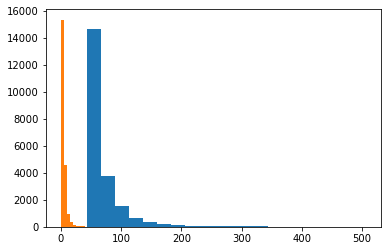

In [12]:
plt.hist(r_vir, bins=20)
plt.hist(rs_klypin, bins=20)

In [13]:
np.mean(r_vir), np.mean(rs_klypin)

(69.04899, 5.451381)

(array([1.800e+01, 1.300e+01, 4.500e+01, 8.400e+01, 1.550e+02, 3.340e+02,
        6.270e+02, 1.238e+03, 2.499e+03, 4.110e+03, 4.954e+03, 3.812e+03,
        2.110e+03, 9.880e+02, 3.950e+02, 1.850e+02, 7.400e+01, 2.400e+01,
        1.100e+01, 3.000e+00]),
 array([0.3371031 , 0.41765845, 0.4982138 , 0.57876915, 0.6593245 ,
        0.73987985, 0.8204352 , 0.90099055, 0.9815459 , 1.0621012 ,
        1.1426566 , 1.223212  , 1.3037673 , 1.3843226 , 1.464878  ,
        1.5454334 , 1.6259887 , 1.706544  , 1.7870994 , 1.8676548 ,
        1.9482101 ], dtype=float32),
 <BarContainer object of 20 artists>)

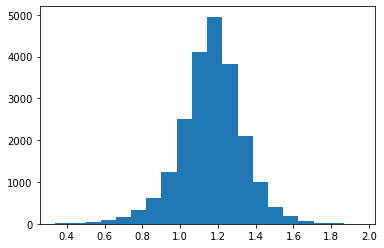

In [14]:
plt.hist(np.log10(np.array(r_vir)/np.array(rs_klypin)), bins=20)

In [15]:
nbins=30
# edges=np.percentile(Mhf[Mhf>10.5], np.linspace(0,100,nbins))
edges=np.linspace(10, max(Mhf),nbins)
centers=(edges[:-1]+edges[1:])/2
sigM=[]
ysigs, predsigs = [], []
yb, predb = [], []
pillai_gnn = []
pillai_ys = []
pred1684, ys1684 = [], []

k=0

for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<=Mhf,edges[i+1]>=Mhf)
    ysigs.append(np.std(yte[:,k][mask]))
    predsigs.append(np.std(pred[:,k][mask]))
    sigM.append(np.std(pred[:,k][mask]-ys[:,k][mask]))
    yb.append(np.mean(ys[:,k][mask]))
    predb.append(np.mean(pred[:,k][mask]))
    pillai_gnn.append((np.percentile(pred[:,k][mask], 84)-np.percentile(pred[:,k][mask], 16))/2)
    pillai_ys.append((np.percentile(ys[:,k][mask], 84)-np.percentile(ys[:,k][mask], 16))/2)
    pred1684.append(np.percentile(pred[:,k][mask], [16,84]))
    ys1684.append(np.percentile(ys[:,k][mask], [16,84]))
    
#     predb.append(np.mean(pred[mask]))
    
sigM=np.array(sigM)
ysigs, predsigs = np.array(ysigs), np.array(predsigs)
yb, predb = np.array(yb), np.array(predb)
ys1684, pred1684 = np.vstack(ys1684), np.vstack(pred1684)

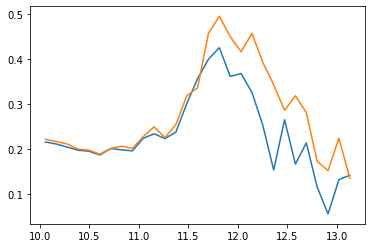

In [16]:
plt.plot(centers, pillai_gnn)
plt.plot(centers, pillai_ys)

/tmp/ipykernel_15382/3619917577.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set(ylim=(6,12), xlim=(10,13.5), xticklabels=[10,10.5,11,11.5,12,12.5,13],\


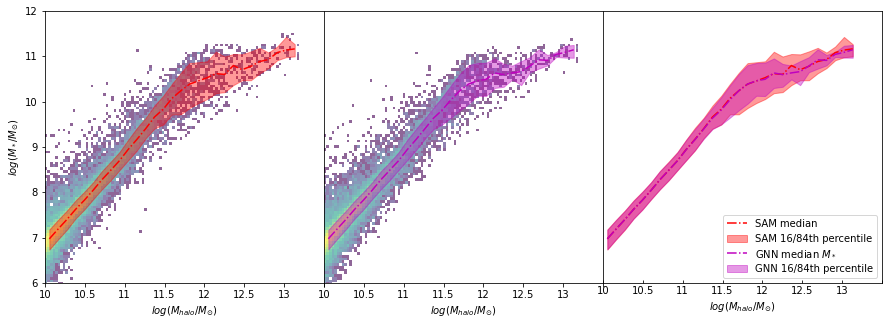

In [17]:
fig, ax = plt.subplots(1,3, figsize=(15,5), sharey=True, gridspec_kw={'wspace': 0.0, 'hspace': 0.0})
# ax[0].plot(Mhf, ys[:,k]+9, 'ko', markersize=0.2, alpha=0.1)
l = 0.

ahist, afill = 0.6, 0.4
cmap = mpl.cm.viridis
# cmap = mpl.cm.Greys

ax[0].hist2d(Mhf, ys[:,k]+9, bins=100, range=[np.percentile(Mhf, [0+l,100-l]),\
                                    np.percentile(np.hstack([ys[:,k]+9,pred[:,k]+9]), [0+l,100-l])],\
             norm=mpl.colors.LogNorm(), cmap=cmap, alpha=ahist)

ax[0].fill_between(centers, ys1684[:,0]+9, ys1684[:,1]+9, color='r', alpha=afill)
ax[0].plot(centers, yb+9, 'r-.')
# ax[1].plot(Mhf, pred[:,k]+9, 'ko', markersize=0.2, alpha=0.1)
ax[1].hist2d(Mhf, pred[:,k]+9, bins=100, range=[np.percentile(Mhf, [0+l,100-l]),\
                                    np.percentile(np.hstack([ys[:,k]+9,pred[:,k]+9]), [0+l,100-l])],\
             norm=mpl.colors.LogNorm(), cmap=cmap, alpha=ahist)
ax[1].fill_between(centers, pred1684[:,0]+9, pred1684[:,1]+9, color='m', alpha=afill)
ax[1].plot(centers, predb+9, 'm-.')

ax[2].plot(centers, yb+9, 'r-.', label = r'SAM median')
ax[2].fill_between(centers, ys1684[:,0]+9, ys1684[:,1]+9, color='r', alpha=afill, label = r'SAM 16/84th percentile')
ax[2].plot(centers, predb+9, 'm-.', label= r'GNN median $M_*$')
ax[2].fill_between(centers, pred1684[:,0]+9, pred1684[:,1]+9, color='m', alpha=afill, label = r'GNN 16/84th percentile')


for a in ax:
    a.set(ylim=(6,12), xlim=(10,13.5), xticklabels=[10,10.5,11,11.5,12,12.5,13],\
         xlabel = r'$log(M_{halo}/M_{\odot})$')
ax[0].set(ylabel = r'$log(M_*/M_{\odot})$',)
ax[1].tick_params(direction='out', top=False, right=False, left=False)
ax[2].tick_params(direction='in', top=False, right=False, left=False)
ax[2].legend()

/tmp/ipykernel_15382/1642155820.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set(ylim=(6,12), xlim=(10,13.5), xticklabels=[10,10.5,11,11.5,12,12.5,13],\


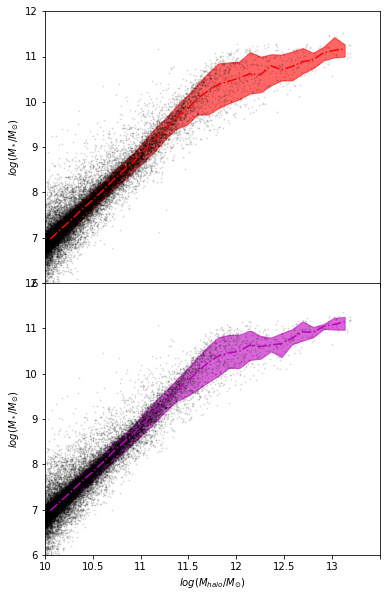

In [18]:
fig, ax = plt.subplots(2, figsize=(6,10), sharex=True, gridspec_kw={'wspace': 0.0, 'hspace': 0.0})
aplot, afill = 0.1, 0.6
ms = 1
ax[0].plot(Mhf, ys[:,k]+9, 'ko', markersize=ms, alpha=aplot)
ax[0].fill_between(centers, ys1684[:,0]+9, ys1684[:,1]+9, color='r', alpha=afill)
ax[0].plot(centers, yb+9, 'r-.')

ax[1].plot(Mhf, pred[:,k]+9, 'ko', markersize=ms, alpha=aplot)
ax[1].fill_between(centers, pred1684[:,0]+9, pred1684[:,1]+9, color='m', alpha=afill)
ax[1].plot(centers, predb+9, 'm-.')

for a in ax:
    a.set(ylim=(6,12), xlim=(10,13.5), xticklabels=[10,10.5,11,11.5,12,12.5,13],\
         xlabel = r'$log(M_{halo}/M_{\odot})$')
    a.set(ylabel = r'$log(M_*/M_{\odot})$',)

In [19]:
# len(Ys[-1]), len(res_y[-1])

In [20]:
concentration = np.log10(np.array(r_vir)/np.array(rs_klypin)) #should be r_200/rs

In [21]:
nbins=15
edges=np.linspace(min(Mhf), max(Mhf),nbins)
centers=(edges[:-1]+edges[1:])/2
deltay=[]
deltapred=[]
dys = []
dpreds = []
Mhf = np.array(Mhf)
for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<=Mhf,edges[i+1]>=Mhf)
    deltay.append(np.median(ys[:,k][mask]/Mhf[mask]-np.median(ys[:,k][mask]/Mhf[mask])))
    deltapred.append(np.median(pred[:,k][mask]/Mhf[mask]-np.median(pred[:,k][mask]/Mhf[mask])))
    dys.append(ys[:,k][mask]/Mhf[mask]-np.median(ys[:,k][mask]/Mhf[mask]))
    dpreds.append(pred[:,k][mask]/Mhf[mask]-np.median(pred[:,k][mask]/Mhf[mask]))
    
dys = np.hstack(dys) 
dpreds = np.hstack(dpreds) 

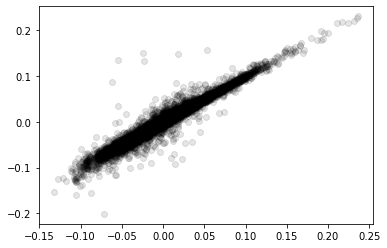

In [22]:
plt.plot(dpreds, dys, 'ko', alpha=0.1)

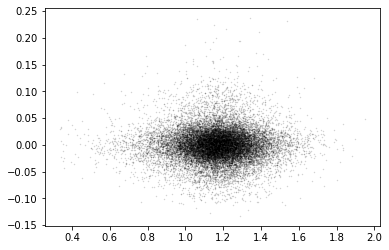

In [23]:
plt.plot(concentration, dpreds, 'ko', alpha=0.2, markersize = 0.4)

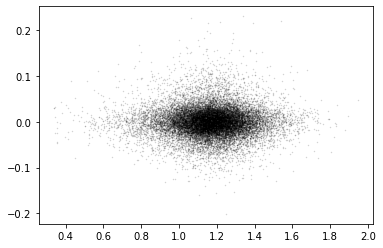

In [24]:
plt.plot(concentration, dys, 'ko', alpha=0.2, markersize = 0.4)

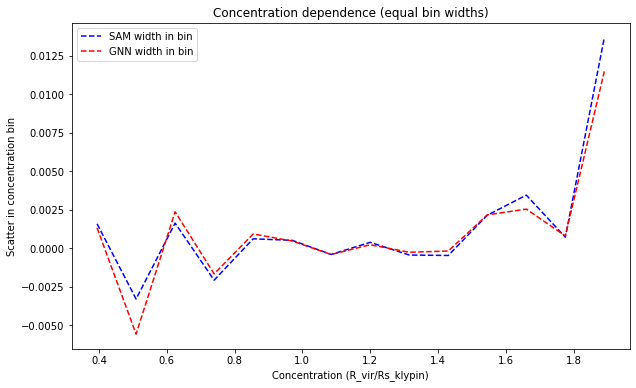

In [25]:
edges=np.linspace(min(concentration), max(concentration), nbins)
centers=(edges[:-1]+edges[1:])/2
deltay=[]
deltapred=[]
for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<concentration,edges[i+1]>=concentration)
    deltay.append(np.median(dys[mask]))
    deltapred.append(np.median(dpreds[mask]))
fig, ax =plt.subplots(ncols=1,nrows=1, figsize=(10,6))
# ax=ax.flatten()
# ax.vlines(edges, min(deltay)-0.03, min(deltay)-0.01, color='gray', linestyle='--', label='bins used')
ax.plot(centers, deltay, 'b--', label='SAM width in bin')
ax.plot(centers, deltapred, 'r--', label='GNN width in bin')
ax.set(xlabel=r'Concentration (R_vir/Rs_klypin)', ylabel=r'Scatter in concentration bin', 
       title='Concentration dependence (equal bin widths)')
ax.legend()

In [26]:
Y=np.log10(np.array(r_vir)/np.array(rs_klypin)) #should be r_200/rs

In [27]:
nbins=20
edges=np.percentile(Y, np.linspace(0,100,nbins))
# edges=np.linspace(, max(Mhf),nbins)
centers=(edges[:-1]+edges[1:])/2
deltay=[]
deltapred=[]

for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<Y,edges[i+1]>=Y)
    deltay.append(np.mean(ys[mask]-np.median(ys[mask])))
    deltapred.append(np.mean(pred[mask]-np.median(pred[mask])))
    

In [28]:
deltay 

[0.16236374,
 0.15221041,
 0.13833039,
 0.08278461,
 0.08928597,
 0.062394045,
 0.039052896,
 0.0173287,
 -0.016373565,
 -0.020554882,
 -0.030087195,
 -0.08528569,
 -0.10011848,
 -0.12498149,
 -0.16455136,
 -0.19938174,
 -0.22409904,
 -0.27047992,
 -0.3226228]

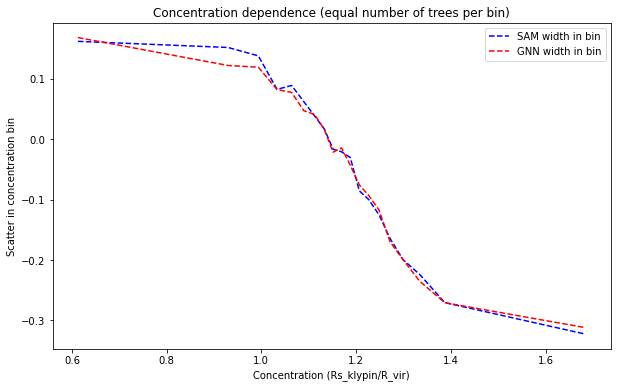

In [29]:
fig, ax =plt.subplots(ncols=1,nrows=1, figsize=(10,6))
# ax=ax.flatten()
# ax.vlines(edges, min(deltay)-0.03, min(deltay)-0.01, color='gray', linestyle='--', label='bins used')
ax.plot(centers, deltay, 'b--', label='SAM width in bin')
ax.plot(centers, deltapred, 'r--', label='GNN width in bin')
ax.set(xlabel=r'Concentration (Rs_klypin/R_vir)', ylabel=r'Scatter in concentration bin', 
       title='Concentration dependence (equal number of trees per bin)')
ax.legend()

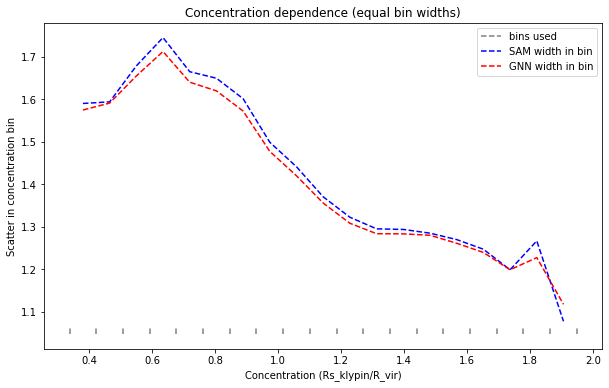

In [30]:
edges=np.linspace(min(Y), max(Y), nbins)
centers=(edges[:-1]+edges[1:])/2
deltay=[]
deltapred=[]

for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<Y,edges[i+1]>=Y)
    deltay.append(np.std(ys[mask]-np.mean(ys[mask])))
    deltapred.append(np.std(pred[mask]-np.mean(pred[mask])))
fig, ax =plt.subplots(ncols=1,nrows=1, figsize=(10,6))
# ax=ax.flatten()
ax.vlines(edges, min(deltay)-0.03, min(deltay)-0.01, color='gray', linestyle='--', label='bins used')
ax.plot(centers, deltay, 'b--', label='SAM width in bin')
ax.plot(centers, deltapred, 'r--', label='GNN width in bin')
ax.set(xlabel=r'Concentration (Rs_klypin/R_vir)', ylabel=r'Scatter in concentration bin', 
       title='Concentration dependence (equal bin widths)')
ax.legend()

In [55]:
nbins = 25
# edges=np.percentile(Mhf[Mhf>10.5], np.linspace(0,100,nbins))
edges=np.linspace(min(Mhf), max(Mhf),nbins)
centers=(edges[:-1]+edges[1:])/2
res_y = []
res_pred = []
Ys = []
for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<=Mhf,edges[i+1]>=Mhf)
    res_y.append(ys[:,k][mask]-np.median(ys[:,k][mask]))
    res_pred.append(pred[:,k][mask]-np.median(pred[:,k][mask]))
    Ys.append(Y[mask])
    
res_y = np.hstack(res_y).flatten()
res_pred = np.hstack(res_pred).flatten()
Ys = np.hstack(Ys)

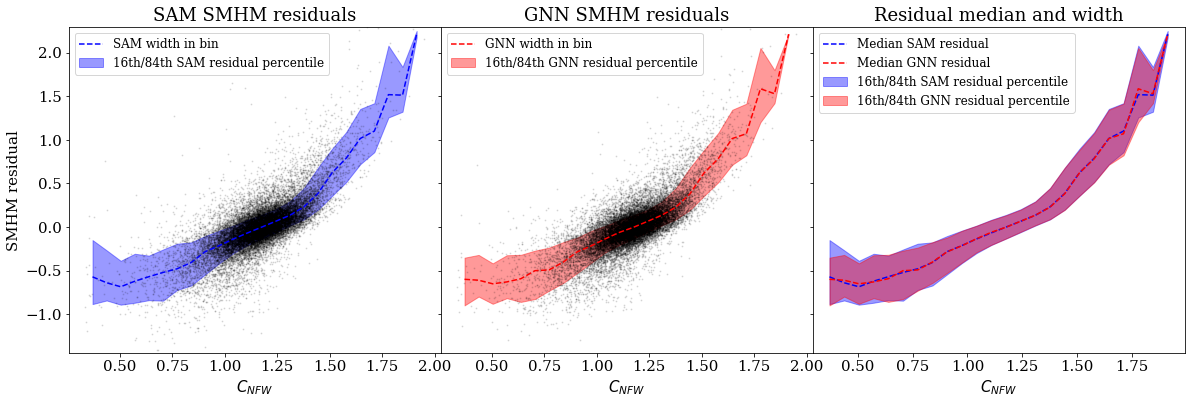

In [57]:
font = {'family' : 'Serif',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)


edges=np.linspace(min(Ys), max(Ys), nbins)
centers=(edges[:-1]+edges[1:])/2
deltay = []
deltapred = []
dy1684 = []
dpred1684 = []

aplot, afill = 0.1, 0.4
l=0.01

titles = ['SAM SMHM residuals', 'GNN SMHM residuals', 'Residual median and width']

for i in range(len(edges)-1):
    mask=np.logical_and(edges[i]<Ys,edges[i+1]>=Ys)
    deltay.append(np.median(res_y[mask]))
    dy1684.append(np.percentile(res_y[mask], [16,84]))
    
    deltapred.append(np.median(res_pred[mask]))
    dpred1684.append(np.percentile(res_pred[mask], [16,84]))
    
    
dpred1684 = np.vstack(dpred1684)
dy1684 = np.vstack(dy1684)

fig, ax =plt.subplots(ncols=3,nrows=1, figsize=(20,6), sharey=True, gridspec_kw={'wspace': 0.0, 'hspace': 0.0})
ax=ax.flatten()
ax[0].plot(Ys, res_y, 'ko', markersize=1, alpha=aplot)
# ax[0].vlines(edges, min(deltay)-0.03, min(deltay)-0.01, color='gray', linestyle='--', label='bins used')
ax[0].plot(centers, deltay, 'b--', label='SAM width in bin')
ax[1].plot(Ys, res_pred, 'ko', markersize=1, alpha=aplot)
# ax[1].vlines(edges, min(deltay)-0.03, min(deltay)-0.01, color='gray', linestyle='--', label='bins used')
ax[1].plot(centers, deltapred, 'r--', label='GNN width in bin')

ax[0].fill_between(centers, dy1684[:,0], dy1684[:,1], color='b', alpha=afill, label='16th/84th SAM residual percentile')
ax[1].fill_between(centers, dpred1684[:,0], dpred1684[:,1], color='r', alpha=afill, label='16th/84th GNN residual percentile')


ax[2].plot(centers, deltay, 'b--', label='Median SAM residual')
ax[2].plot(centers, deltapred, 'r--', label='Median GNN residual')
ax[2].fill_between(centers, dy1684[:,0], dy1684[:,1], color='b', alpha=afill, label='16th/84th SAM residual percentile')
ax[2].fill_between(centers, dpred1684[:,0], dpred1684[:,1], color='r', alpha=afill, label='16th/84th GNN residual percentile')

for i, a in enumerate(ax):
    if i==0:
        a.set(xlabel=r'$C_{NFW}$', ylabel=r'SMHM residual', 
           title=titles[i], ylim = np.percentile(np.hstack([res_y, res_pred]), [l, 100-l]))
    else:
        a.set(xlabel=r'$C_{NFW}$', 
           title=titles[i], ylim = np.percentile(np.hstack([res_y, res_pred]), [l, 100-l]))
    a.legend(fontsize=12)

In [58]:
fig.savefig('../paper_figures/concentration_dependence.png')